In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
def H(n):
	"""Returns an approximate value of n-th harmonic number.

	   http://en.wikipedia.org/wiki/Harmonic_number
	"""
	# Euler-Mascheroni constant
	gamma = 0.57721566490153286060651209008240243104215933593992
	return gamma + log(n) + 0.5/n - 1./(12*n**2) + 1./(120*n**4)
H_vectorized = np.vectorize(H)

In [4]:
from json_to_csv import default_patterns, compile_from_json

In [9]:
patt = default_patterns[0][0]

In [11]:
df = compile_from_json(patt)

In [16]:
unique_eccentricities = np.unique(df['eccentricity'].ravel())

In [41]:
len(unique_eccentricities)

10

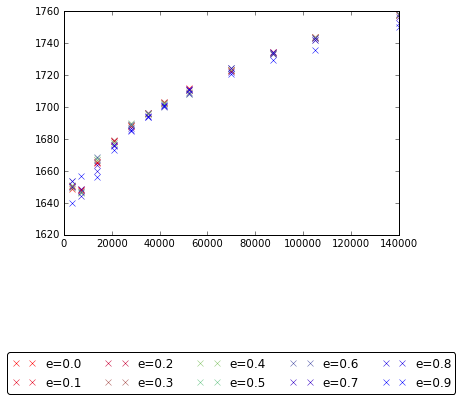

In [57]:
import matplotlib as mpl


cmap = [(255,0,2),
(228,0,28),
(201,1,54),
(170,86,82),
(138,199,110),
(108,199,138),
(79,85,168),
(51,0,197),
(25,0,227),
(0,0,255)]

color = mpl.colors.ListedColormap(np.array(cmap)/float(255)).colors

for index,ecc in enumerate(unique_eccentricities):
    subset = df[df['eccentricity']==ecc]
    x = subset['area']
    y = subset['E_of_pi']
    plt.plot(x,y, 'x', label='e='+str(ecc), color=color[index])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)

    

In [46]:
plt.figure()



labels = []
for index,item in enumerate( sorted( parsed.items() , key=lambda x: x[0] ) ):
    ecc, obj = item
    x = obj['areas']
    y = obj['S']
    labels.append('e='+str(ecc))

    if marker:
        plt.plot(x, y, 'x', color=color[index], label='e='+str(ecc), ms=6)
    else:
        plt.plot(x, y, color=color[index], label='e='+str(ecc))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), fancybox=True, ncol=5)
#         print sample['sample_size'], sample['E_of_pi']

ax = plt.gca()

if loglog:
    ax.set_yscale('log')
    ax.set_xscale('log')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 1,
                 box.width, box.height * 1])

plt.xlabel('Area')
plt.ylabel('Segregating Sites, S')
ll = 'Log-Log of ' if loglog else ''
plt.title( ll + 'Segregating Sites vs Area')
plt.savefig( file_name , format='png',  bbox_inches='tight')
plt.clf()
plt.cla()

NameError: name 'parsed' is not defined